# XGBoost Parameter Tuning

XGBoost is a popular machine learning algorithm that is used widely by many top competitors at kaggle.
because it is fast on computing and results better scores.

If you dont have XGBoost package:

conda install -c conda-forge xgboost

In [34]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedShuffleSplit
from matplotlib import pyplot
from math import log
from sklearn.metrics import log_loss

In [2]:
datadir= '/home/lacin/Downloads/numerai_datasets/'
df_train = pd.read_csv(datadir + "numerai_training_data.csv")
df_tour = pd.read_csv( datadir + 'numerai_tournament_data.csv')
feature_cols = [f for f in df_train.columns if "feature" in f]

In [3]:
validation_ind = np.where(df_tour.data_type == 'validation')[0]

In [4]:
validation_ind.shape

(46362,)

In [6]:
df_valid=df_tour.iloc[validation_ind]

In [8]:
X_train=df_train[feature_cols].values
y_train=df_train.target.values

In [7]:
X_valid=df_valid[feature_cols].values
y_valid=df_valid.target.values

for xgboost here is steps, i follow
usually i can reach almost good parameters.

initialize parameters such: 
eta = 0.1, 
    depth= 10,
    subsample=1.0, 
    min_child_weight = 5, 
    col_sample_bytree = 0.2, 
set proper objective for the problem 
(reg:linear, reg:logistic or count:poisson for regression, binary:logistic or rank:pairwise for classification)
binary:logistic for Numerai dataset.

split %20 for validation but we have here as Numerai supplies validation data with target values. 
and prepare a watchlist for train and validation set, 
set num_round too high such as 1000000 so you can see the valid prediction for any round value
, if at some point test prediction error rises you can terminate the program running,

i)tune depth parameter, generally depth parameter is invariant to other parameters, 
start from 10 after watching best error rate compare the result for different parameters, change it 8, if error is higher then you can try 12 next time, if for 12 error is lower than 10 , so you can try 15 next time, if error is lower for 8 you would try 5 and so on.

ii) after finding best depth parameter, tune for subsample parameter, i started from 1.0 then change it to 0.8 if error is higher then try 0.9 if still error is higher then i use 1.0, and so on.

iii) in this step tune for min child_weight, same approach above,

iv) then tune for col_Sample_bytree

v) now i decrease the eta to 0.05, and leave program running then get the optimum num_round (where error rate start to increase in watchlist progress),

after these step you can get roughly good parameters 
you can play around these parameters.

In [15]:
model = XGBClassifier(learning_rate=0.1, n_jobs=-1,max_depth=10,min_child_weight=5,subsample=1,\
                      colsample_bytree=0.2, scale_pos_weight=1,seed=27,n_estimators=500)
eval_set = [(X_train, y_train),(X_valid, y_valid)]
train_set = [(X_train, y_train)]
model.fit(X_train, y_train, early_stopping_rounds=40, eval_metric="logloss", eval_set=eval_set, verbose=True)


[0]	validation_0-logloss:0.693091	validation_1-logloss:0.69311
Multiple eval metrics have been passed: 'validation_1-logloss' will be used for early stopping.

Will train until validation_1-logloss hasn't improved in 40 rounds.
[1]	validation_0-logloss:0.693022	validation_1-logloss:0.693032
[2]	validation_0-logloss:0.692969	validation_1-logloss:0.692961
[3]	validation_0-logloss:0.6929	validation_1-logloss:0.692883
[4]	validation_0-logloss:0.692828	validation_1-logloss:0.69285
[5]	validation_0-logloss:0.69277	validation_1-logloss:0.69282
[6]	validation_0-logloss:0.692733	validation_1-logloss:0.692832
[7]	validation_0-logloss:0.692686	validation_1-logloss:0.692772
[8]	validation_0-logloss:0.69265	validation_1-logloss:0.69276
[9]	validation_0-logloss:0.692619	validation_1-logloss:0.69274
[10]	validation_0-logloss:0.692578	validation_1-logloss:0.692723
[11]	validation_0-logloss:0.692531	validation_1-logloss:0.6927
[12]	validation_0-logloss:0.69249	validation_1-logloss:0.692714
[13]	validat

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.2, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=5, missing=None, n_estimators=500,
       n_jobs=-1, nthread=None, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=27, silent=True, subsample=1)

In [31]:
model = XGBClassifier(learning_rate=0.01, n_jobs=-1,max_depth=3,min_child_weight=4,subsample=0.5,\
                      colsample_bytree=0.5, scale_pos_weight=1,seed=27,n_estimators=500)
eval_set = [(X_train, y_train),(X_valid, y_valid)]
train_set = [(X_train, y_train)]
model.fit(X_train, y_train, early_stopping_rounds=40, eval_metric="logloss", eval_set=eval_set, verbose=True)

[0]	validation_0-logloss:0.693138	validation_1-logloss:0.693142
Multiple eval metrics have been passed: 'validation_1-logloss' will be used for early stopping.

Will train until validation_1-logloss hasn't improved in 40 rounds.
[1]	validation_0-logloss:0.693128	validation_1-logloss:0.693136
[2]	validation_0-logloss:0.693119	validation_1-logloss:0.693127
[3]	validation_0-logloss:0.69311	validation_1-logloss:0.693119
[4]	validation_0-logloss:0.693102	validation_1-logloss:0.693111
[5]	validation_0-logloss:0.693092	validation_1-logloss:0.693108
[6]	validation_0-logloss:0.693084	validation_1-logloss:0.693102
[7]	validation_0-logloss:0.693077	validation_1-logloss:0.693096
[8]	validation_0-logloss:0.693069	validation_1-logloss:0.693093
[9]	validation_0-logloss:0.693062	validation_1-logloss:0.693089
[10]	validation_0-logloss:0.693054	validation_1-logloss:0.693079
[11]	validation_0-logloss:0.693045	validation_1-logloss:0.693077
[12]	validation_0-logloss:0.693036	validation_1-logloss:0.693073
[

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_delta_step=0,
       max_depth=3, min_child_weight=4, missing=None, n_estimators=500,
       n_jobs=-1, nthread=None, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=27, silent=True, subsample=0.5)

to prevent overfitting, 
the first way is to directly control model complexity
This include max_depth, min_child_weight and gamma
the second way is to add randomness to make training robust to noise
This include subsample, colsample_bytree
You can also reduce stepsize eta, but needs to remember to increase num_round when you do so.


# Evaluate XGBoost Models With Learning Curves

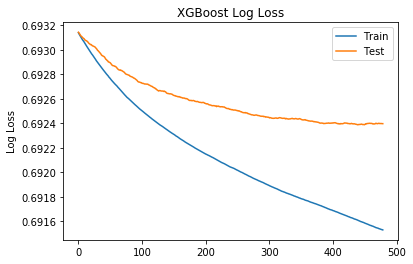

In [32]:
# retrieve performance metrics
results = model.evals_result()
epochs = len(results['validation_0']['logloss'])
x_axis = range(0, epochs)
# plot log loss
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
ax.legend()
pyplot.ylabel('Log Loss')
pyplot.title('XGBoost Log Loss')
pyplot.show()

# Consistency Check!

Consistency measures the count of eras in which your model achieves a logloss < -ln(0.5). Numerai wants models that work well consistently across eras. Only models with consistency above 75% are considered consistent.

In [38]:
prob_pos= model.predict_proba(X_valid)
df_valid['pf']=prob_pos[:,1]

eras = df_valid.era.unique()
good_eras = 0
for era in eras:

    tmp = df_valid[ df_valid.era == era ]
    ll = log_loss( tmp.target, tmp.pf)
    is_good = ll < -log( 0.5 )

    if is_good:
        good_eras += 1

    print( "{} {} {:.2%} {}".format( era, len( tmp ), ll, is_good ))

consistency = good_eras / float( len( eras ))
print( "\nconsistency: {:.1%} ({}/{})".format( consistency, good_eras, len( eras )))

/home/lacin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


era121 3784 69.24% True
era122 3802 69.15% True
era123 3736 69.28% True
era124 3826 69.17% True
era125 3863 69.25% True
era126 3980 69.21% True
era127 3779 69.35% False
era128 3833 69.25% True
era129 3931 69.08% True
era130 4007 69.24% True
era131 3990 69.26% True
era132 3831 69.40% False

consistency: 83.3% (10/12)
